# サンプルデータ

In [23]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline

## 線形データ

n=20

In [25]:
a = np.arange(n).reshape(4, -1); a  # 5列の行列

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [26]:
df = pd.DataFrame(a, columns=list('abcde')); df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


## ランダムデータ

r = np.random.randn(4, 5); r

In [27]:
df = pd.DataFrame(r, columns=list('abcde')); df

array([[-0.76798351,  0.39545824, -0.18938856, -1.34485011,  0.8722842 ],
       [ 0.87813634, -0.80880185,  1.10395955,  2.44202835,  0.04306526],
       [ 0.33626586,  0.29698914,  0.82286026, -1.07663082, -0.3184203 ],
       [-0.34109916, -0.04371998,  0.9267362 , -0.27744202, -0.16861789]])

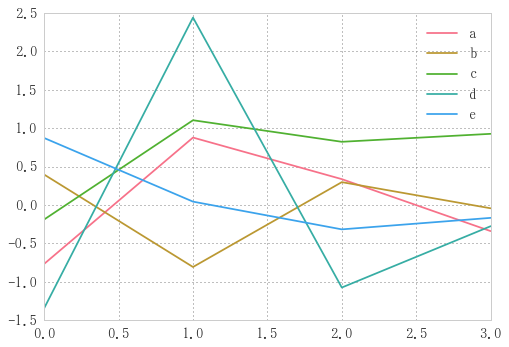

In [29]:
df.plot()

In [30]:
df = pd.DataFrame(np.random.randn(n,n))

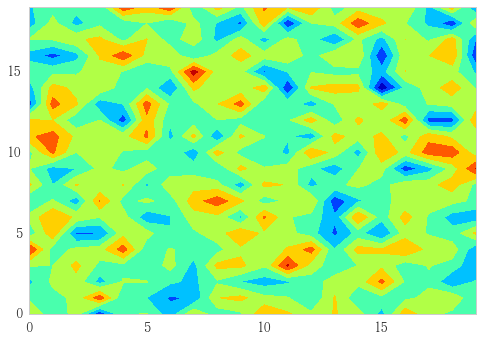

In [31]:
plt.contourf(df, cmap='jet')

等高線表示

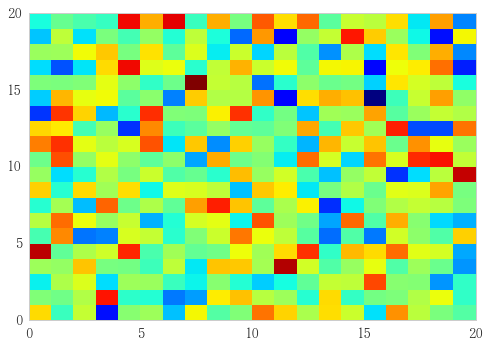

In [32]:
plt.pcolor(df, cmap='jet')

カラーマップ表示

## sin波

In [33]:
n=100
x = np.linspace(0, 2*np.pi, n)

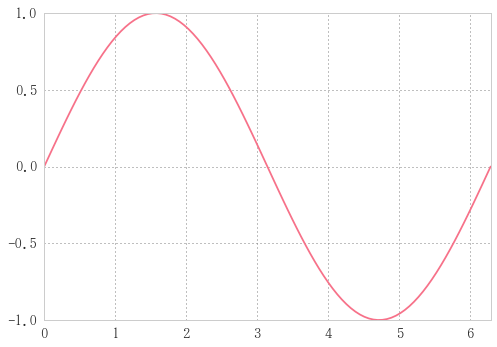

In [34]:
s = pd.Series(np.sin(x), index=x)
s.plot()

sin波

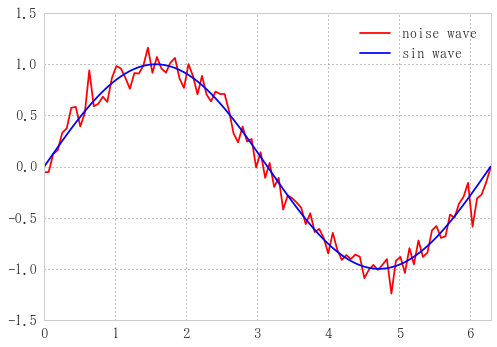

In [35]:
snoise = s + 0.1 * np.random.randn(n)
sdf = pd.DataFrame({'sin wave':s, 'noise wave': snoise})
sdf.plot(color=('r', 'b'))

ノイズをのせた

## 減衰振動

In [1]:
n=100
x = np.linspace(0, 6*np.pi, n)

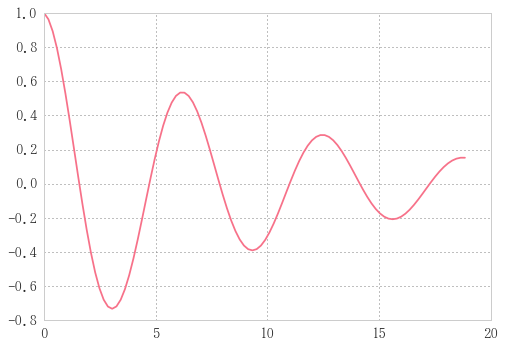

In [10]:
dos = np.exp(-0.1*x) * np.cos(x)
plt.plot(x, dos)

$$ Ce^{-\zeta\omega_0t}\cos \left({\omega_0\sqrt{1-\zeta^2}t-\alpha} \right) $$

## 正規分布

In [6]:
import scipy.stats as ss

In [7]:
n=100
x = np.linspace(-5, 5, n)

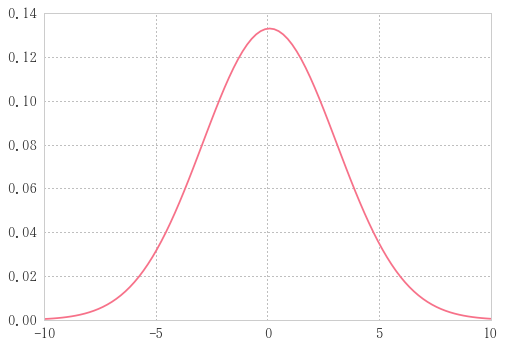

In [19]:
median = x[int(n/2)]  # xの中央値
g = pd.Series(ss.norm.pdf(x, loc=median, scale=3), x)
g.plot()

$$y(x) = \exp \left( \frac{-x^2/2}{\sqrt{2\pi}} \right) $$

$loc$と$scale$が指定されたときは、$x$が$\frac{x-loc}{scale}$となる。

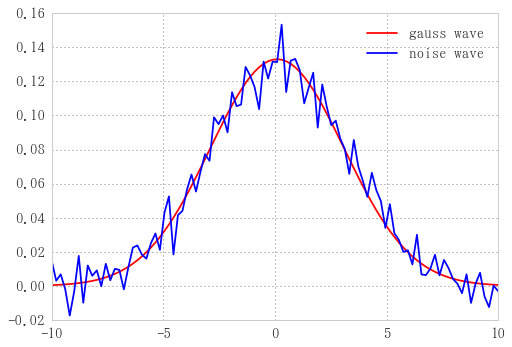

In [20]:
gnoise = g + 0.01 * np.random.randn(n)
df = pd.DataFrame({'gauss wave':g, 'noise wave': gnoise})
df.plot(color=('r', 'b'))

## log関数

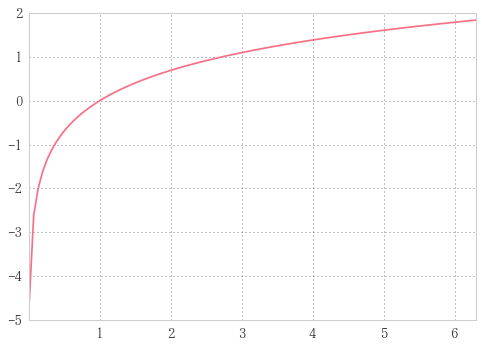

In [38]:
median = x[int(n/2)]  # xの中央値
x1 = x + 10e-3
l = pd.Series(np.log(x1), x1)
l.plot()

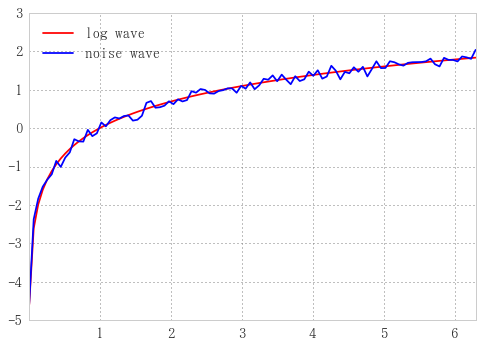

In [39]:
lnoise = l + 0.1 * np.random.randn(n)
df = pd.DataFrame({'log wave':l, 'noise wave': lnoise})
df.plot(color=('r', 'b'))

## シグモイド関数(ロジスティック関数)

In [2]:
from scipy.special import expit

In [12]:
n = 100
m = 10
x = np.linspace(-m, m, n)

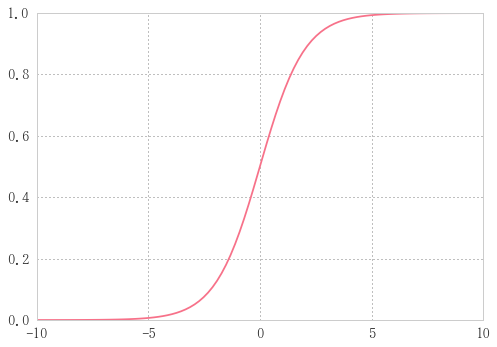

In [25]:
sig = expit(x)
plt.plot(x, sig)

 $$y(x) = \frac{1}{(1+e^{-x})}$$

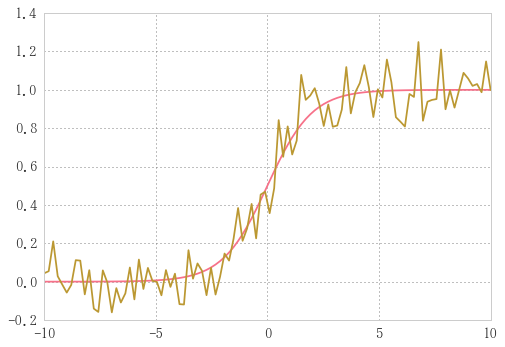

In [28]:
signoise = sig + 0.1 * np.random.randn(n)
plt.plot(x, sig)
plt.plot(x, signoise)

## ランダムウォーク

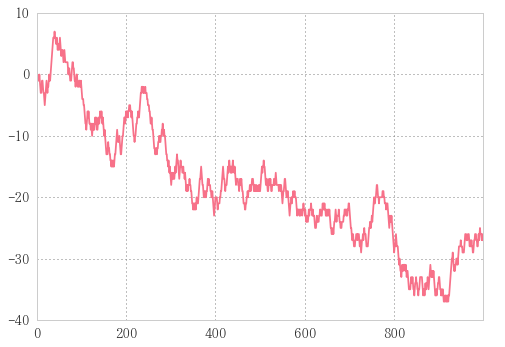

In [89]:
n = 1000
se = pd.Series(np.random.randint(-1, 2, n)).cumsum()
se.plot()

np.random.randint(-1, 2, n)で(-1, 0, 1)のどれかをランダムにn個生成し、cumsum()で積み上げ合計していくことでランダムウォークを描く。

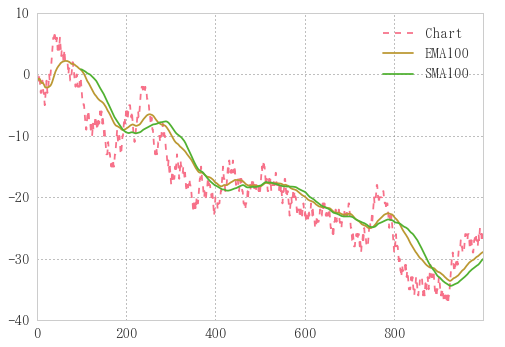

In [90]:
sma100 = se.rolling(100).mean()
ema100 = se.ewm(span=100).mean()

df = pd.DataFrame({'Chart': se,  'SMA100': sma100, 'EMA100': ema100})
df.plot(style = ['--','-','-'])

単純移動平均線(Simple Moving Average)と指数移動平均線(Exponential Moving Average)を同時に描画した。
EMAの方がSMAと比べて一般的に直近の動きを反映しやすく、トレンドに追随しやすいといわれている。